**Created on 12/12/2022**

**Authors: Amir Najjar, Sibel Yuksel**

**License: this code is released under the CeCILL 2.1 license. See https://www.cecill.info/licenses/Licence_CeCILL_V2.1-en.txt**

# Guide visualisation
Nous allons utiliser les librairie `matplotlib` et `seaborn`. `matplotlib` nous donne des fonctionnalités de visualisation simples et `seaborn` permettra d'avoir des fonctionnalités plus larges. Les règles et conventions ci-dessous permettent d'avoir une homogénéité entre les résultats de tous les groupes.

Ce notebook est inspiré des guides trouvés sur https://seaborn.pydata.org/tutorial.html et https://www.python-graph-gallery.com/.

Pour installer `seaborn` il suffit d'exécuter les commande `pip install matplotlib` et `pip install seaborn`.

In [2]:
!pip install seaborn
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importations
Pour importer `matplotlib` et `seaborn`, utiliser les commande dessous. Les alias utilisés sont `plt` et `sns`.
Pour la représentation 3D, nous pouvons utiliser une autre librairie `mlp_toolkits.mplot3d` :

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Pour la représentation 3D, on peut utiliser 
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# libraries pour créer des exemples
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## Importation des données

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv('/content/drive/MyDrive/M2 SID/PIP2023/Dataset_complete.csv')

In [16]:
df.columns

Index(['initiator', 'target', 'protocol', 'nlos_indicator', 't1', 't2', 't3',
       't4', 'skew', 'tof', 'tof_skew', 'range', 'range_skew', 'ranging_unit',
       'ranging_error', 'loc_initiator_x', 'loc_initiator_y',
       'loc_initiator_z', 'loc_target_x', 'loc_target_y', 'loc_target_z',
       'distance', 'course_dist', 'temperature_initiator',
       'temperature_target', 'timestamp', 'seqnum', 'rssi_request', 'rssi_ack',
       'rssi_data', 'rssi_mean', 'register_dump_CIR'],
      dtype='object')

In [14]:
df.head()

,initiator,target,protocol,nlos_indicator,t1,t2,t3,t4,skew,tof,...,course_dist,temperature_initiator,temperature_target,timestamp,seqnum,rssi_request,rssi_ack,rssi_data,rssi_mean,register_dump_CIR
0,183,100,TWR,2.783982,946218857614,946490292658,946594234510,946322802711,-2.368804,1622,...,0.0,30.98,30.220001,1654929794228,4,-80.136574,-80.077130,-79.836296,-80.016667,"{""ACC_MEM"": ""AAT/9gACAAr/+wABAAL/8wAS//AACgAGA..."
1,183,100,TWR,2.920485,1009474709646,1009746235572,1009850439822,1009578917162,-1.045965,1633,...,0.0,30.98,29.840002,1654929795219,10,-80.267769,-79.988684,-79.835720,-80.030724,"{""ACC_MEM"": ""//gAEwAC//X/9gAXABEACwASABQAFgAG/..."
2,183,100,TWR,2.536090,1072923068046,1073194681670,1073299179662,1073027569304,-0.799856,1633,...,0.0,30.98,29.840002,1654929796210,16,-79.964310,-79.850138,-79.693502,-79.835983,"{""ACC_MEM"": ""//QABQAJ//X/9gAUABMADv/3//r//gAK/..."
3,183,100,TWR,2.857669,36731534990,37003232943,37107270798,36835576116,-0.984438,1635,...,0.0,30.98,29.840002,1654929797201,22,-80.040833,-79.818313,-79.849525,-79.902890,"{""ACC_MEM"": ""ACb//AAa//4ADQAJAAYALf/+ABQAEgAOA..."
4,183,100,TWR,2.263103,99923195534,100194974620,100298828942,100027053147,-0.769092,1645,...,0.0,30.98,29.840002,1654929798190,28,-79.999908,-80.102552,-80.022316,-80.041592,"{""ACC_MEM"": ""//b/+P/6//3/8QAI//H//P/1AAkAAv/3A..."


# Définition du style de visualisation
Nous allons utiliser le style `darkgrid` en voici un exemple :

In [11]:
sns.set_style('darkgrid')

In [ ]:
sinplot()
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Sinusoidal plot')
# place the legend:
plt.legend(title="Values of i ",loc='center right', bbox_to_anchor=(1.2, 0.5))

In [19]:
np.unique(df['target']) # 6 target différentes

array([100, 101, 150, 171, 180, 184])

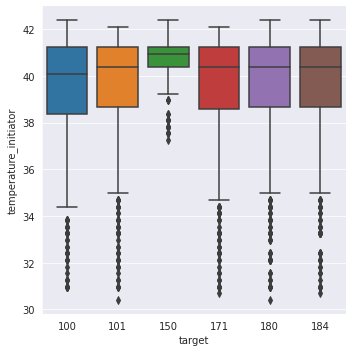

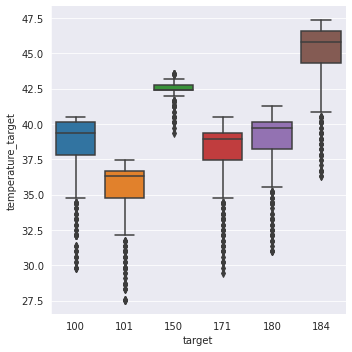

In [30]:
sns.catplot(data=df, x='target', y='temperature_initiator', kind='box')
sns.catplot(data=df, x='target', y='temperature_target', kind='box')

Evolution de la température selon la distance

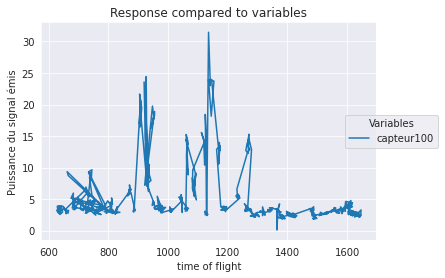

In [52]:
#plot of the figure
plt.figure()
plt.plot(df[df.target == 100]['tof'], df[df.target == 100]['nlos_indicator'], label='capteur100')
#plt.plot(df[df.target == 101]['seqnum'], df[df.target == 101]['t2'], label='capteur101')
plt.xlabel('time of flight')
plt.ylabel('Puissance du signal émis')
plt.title('Response compared to variables')
plt.legend(title="Variables", loc='center right', bbox_to_anchor=(1.2, 0.5))

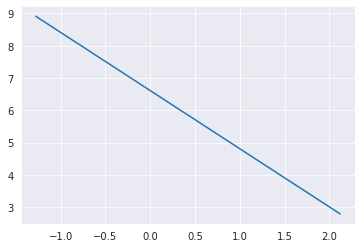

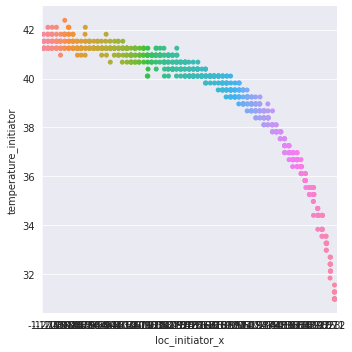

In [62]:
# capteur 100 : 
plt.plot(df[df.target == 100]['loc_initiator_x'], df[df.target == 100]['loc_initiator_y'])
sns.catplot(data = df[df.target == 100], x='loc_initiator_x', y='temperature_initiator')

In [38]:
df[df.target == 100]['loc']

0         4
1        10
2        16
3        22
4        28
       ... 
638    4234
639    4240
640    4246
641    4252
642    4258
Name: seqnum, Length: 643, dtype: int64

In [15]:
# View multiple curves
def sinplot(flip: int=1) -> None:
    """
    Plot of a sinusoidal function
    
    Parameters:
        flip1: exponent in the function 
    
    """
    x = np.linspace(0, 14, 100)
    for i in range(1, 6):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip, label = "i = "+str(i))

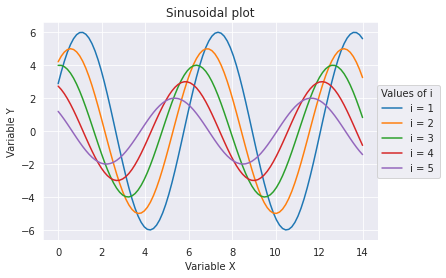

In [7]:
sinplot()
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Sinusoidal plot')
# place the legend:
plt.legend(title="Values of i ",loc='center right', bbox_to_anchor=(1.2, 0.5))

 Il est important de définir les axes et une légende en utilisant `label`, `legend`, `xlabel`, et `ylabel`. Mettre la première lettre dans le titre et les label des axes en majuscule :

- titre : doit se situer en haut (centré au milieu) du graphique
- xlabel, ylabel : première lettre en majuscule
- légende : La légende doit avoir un titre (première lettre en majuscule) et elle doit se situer à l'extérieur du graphe à droite centré au milieu. La légende doit avoir le même style sur chacun des graphiques. Il arrive que les graphiques se créent d'un style différent quand nous utilisons la légende de la méthode d'affichage. Dans ce notebook nous vous montrons plusieurs méthodes pour y remédier.

Il faut éviter de changer les couleurs par défaut sauf si nécessaire.

# Visualiser des courbes
L'exemple ci-dessous indique la visualisation de courbes. Cette visualisation et faite à partir de deux listes (ou `np.array`) x et y :

In [ ]:
x = [1, 3, 5, 7]
y = [10, 1, 3, 7]
y1 = [3, 7, 2, 5]
y2 = [5, 6, 4, 1]

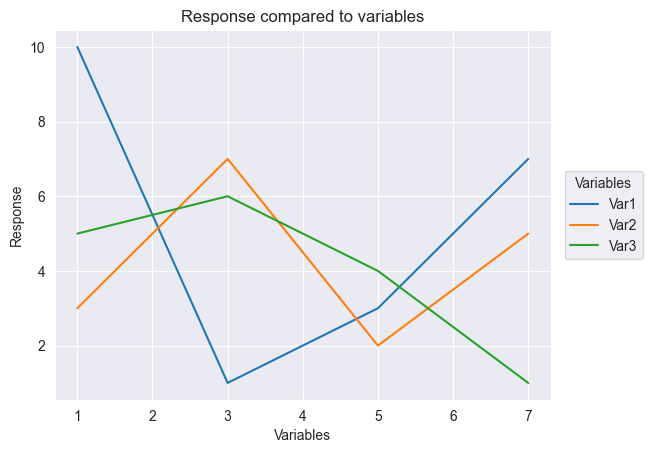

In [ ]:
#plot of the figure
plt.figure()
plt.plot(x, y, label='Var1')
plt.plot(x, y1, label='Var2')
plt.plot(x, y2, label='Var3')
plt.xlabel('Variables')
plt.ylabel('Response')
plt.title('Response compared to variables')
plt.legend(title="Variables", loc='center right', bbox_to_anchor=(1.2, 0.5))

## Chargement de données comme exemple

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Les fonctions seaborn

 Ces paramètres sont souvent présents dans les différentes fonctions seaborn.
- `data` est un DataFrame
- `x` la colonne dans data correspondant à l’abscisse ou un vecteur
- `y` la colonne dans data correspondant à l'ordonnée ou un vecteur
- `hue` permet de donner des couleurs selon les catégories trouvés dans cette colonne ou par un vecteur

## Scatterplot
Nous utilisons `sns.scatterplot`. Cette fonction a comme paramètres les paramètres ci-dessus et un paramètre `alpha` qui permet de définir la transparence des points

Ci-dessous est un exemple d'un scatterplot en passant un `DataFrame` et ses colonnes :

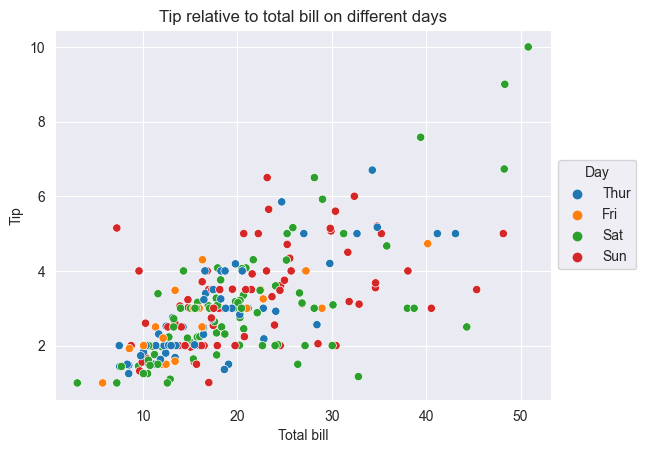

In [ ]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title('Tip relative to total bill on different days')
plt.legend(title="Day", loc='center left', bbox_to_anchor=(1, 0.5))

Cet exemple utilise `alpha` pour augmenter la transparence des points afin de pouvoir visualiser mieux leurs distributions sur le plan :

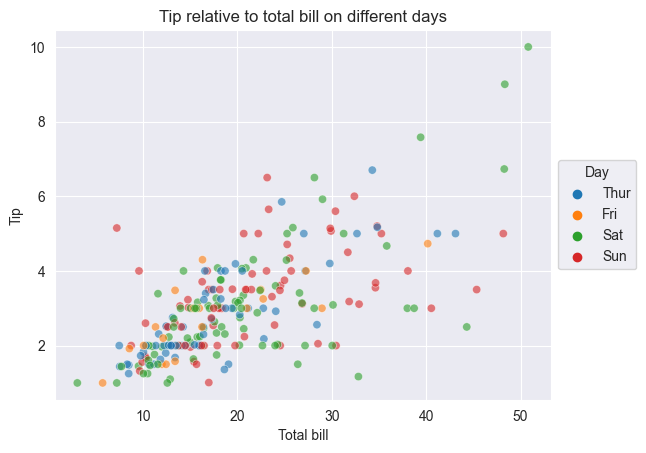

In [ ]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', alpha=0.6)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title('Tip relative to total bill on different days')
plt.legend(title="Day", loc='center left', bbox_to_anchor=(1, 0.5))

Cet exemple passe les colonnes comme vecteurs sans passer le DataFrame :

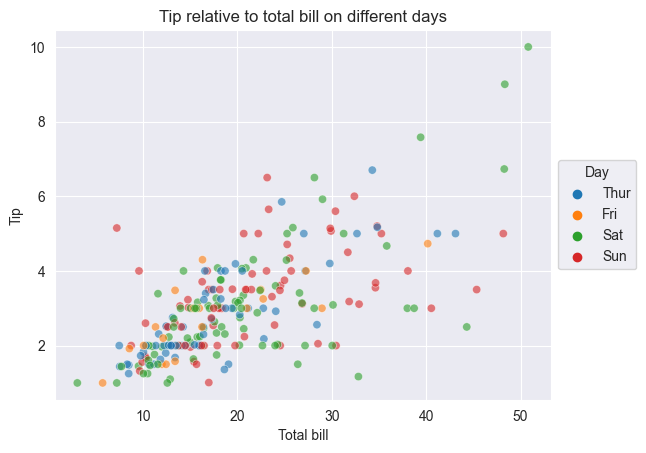

In [ ]:
sns.scatterplot(x=tips.total_bill, y=tips.tip, hue=tips.day, alpha=0.6)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title('Tip relative to total bill on different days')
plt.legend(title="Day", loc='center left', bbox_to_anchor=(1, 0.5))

## Représentation de variables qualitatives

`sns.stripplot` est composé des paramètres de base et d'autres paramètres comme `jitter`. Il est utile pour les variables qualitatives pour ne pas afficher beaucoup de points l'un au dessus de l'autre :

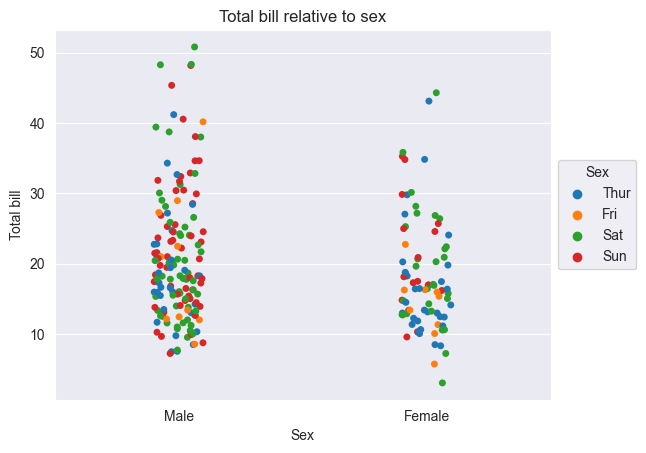

In [ ]:
gfg = sns.stripplot(x="sex", y="total_bill", hue="day", data=tips, jitter=True)
gfg.legend(title='Sex', loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Total bill')
plt.xlabel('Sex')
plt.title('Total bill relative to sex')
plt.show()

## Boxplot

La fonction `sns.catplot` est utilisée avec `kind='box'` pour faire des boxplots. Le paramètre `kind` permet la sélection de l'approche :

Text(0.5, 1.0, 'Boxplot of total bill relative to day')

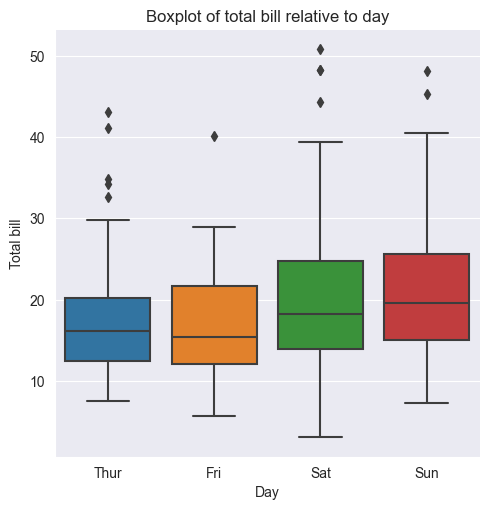

In [ ]:
sns.catplot(data=tips, x='day', y='total_bill', kind='box')
plt.xlabel('Day')
plt.ylabel('Total bill')
plt.title('Boxplot of total bill relative to day')

Combinaison de variables qualitatives avec `hue` :

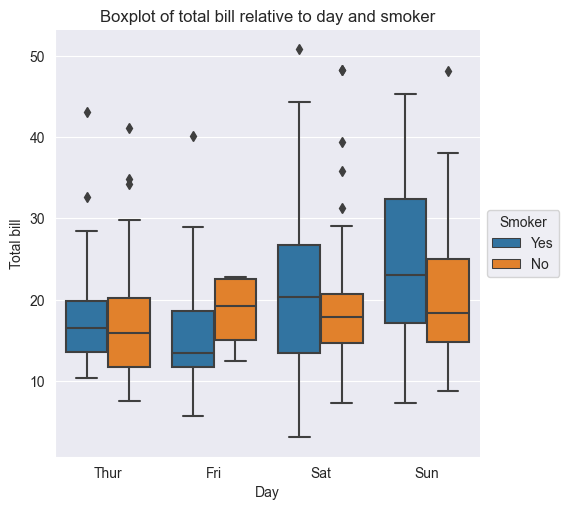

In [ ]:
sns.catplot(data=tips, x='day', y='total_bill', hue="smoker", kind='box', legend=False)
plt.xlabel('Day')
plt.ylabel('Total bill')
plt.title('Boxplot of total bill relative to day and smoker')
plt.legend(title='Smoker',loc='center left', bbox_to_anchor=(1, 0.5))

## Violinplot

Ici pour avoir des violinplot nous initialisons le paramètre `kind='violin` :

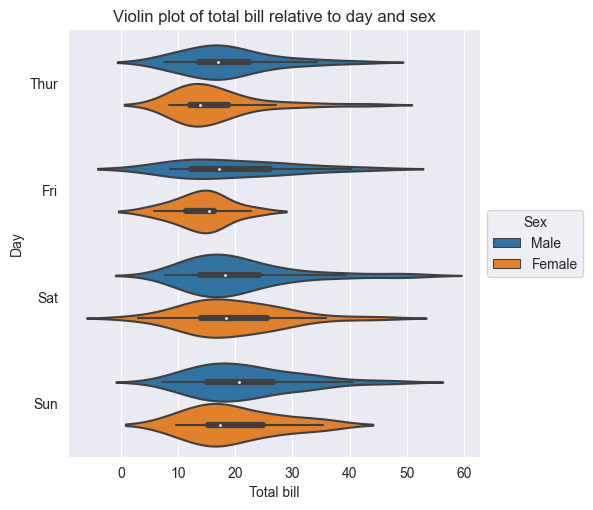

<Figure size 640x480 with 0 Axes>

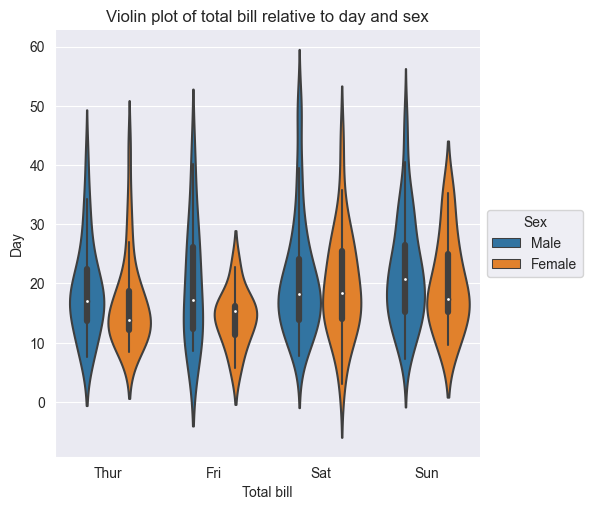

In [ ]:
sns.catplot(
    data=tips, x='total_bill', y='day', hue='sex', kind='violin', legend=False
)
plt.ylabel('Day')
plt.xlabel('Total bill')
plt.title('Violin plot of total bill relative to day and sex')
plt.legend(title="Sex", loc='center left', bbox_to_anchor=(1, 0.5))
# Reverse x and y
plt.figure()
sns.catplot(
    data=tips, y='total_bill', x='day', hue='sex', kind='violin', legend=False
)
plt.ylabel('Day')
plt.xlabel('Total bill')
plt.title('Violin plot of total bill relative to day and sex')
plt.legend(title="Sex", loc='center left', bbox_to_anchor=(1, 0.5))

Une autre façon de faire avec `split=True` :

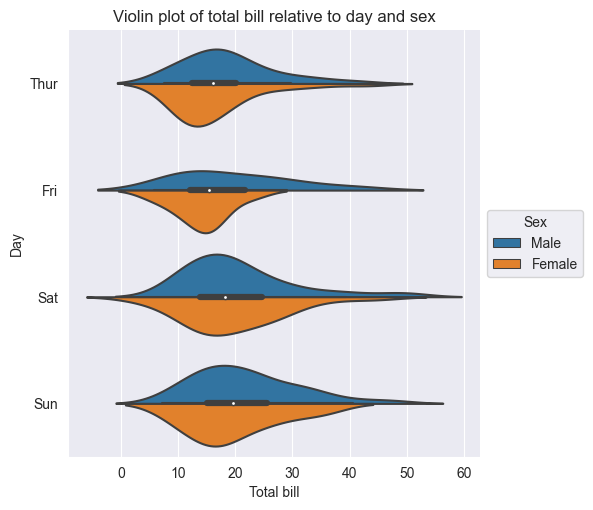

In [ ]:
sns.catplot(
    data=tips, x='total_bill', y='day', hue='sex',
    kind='violin', split=True, legend=False
)
plt.ylabel('Day')
plt.xlabel('Total bill')
plt.title('Violin plot of total bill relative to day and sex')
plt.legend(title="Sex", loc='center left', bbox_to_anchor=(1, 0.5))

## Barplot

La méthode `sns.displot` permet une approche de différentes manière. Nous retrouvons le paramètre `kind` qui permet de choisir l'approche, il est par défaut égale à 'hist' Il existe d'autres paramètres intérréssants pour `displot` comme `bins`, `shrink`, `kind` pour la forme des barres :

Text(13.319444444444445, 0.5, 'Number of flippers')

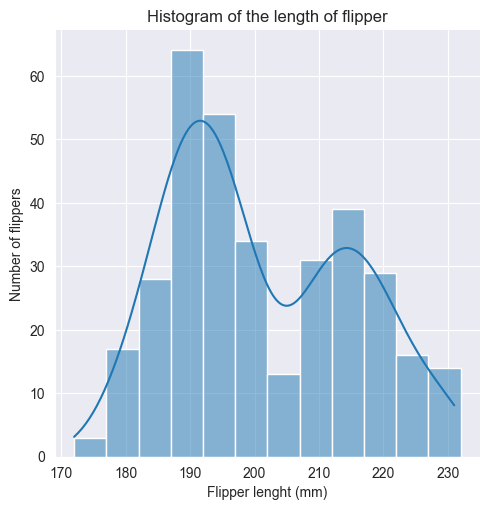

In [ ]:
sns.displot(penguins, x="flipper_length_mm", binwidth=5, kde=True)  # kde = True plots the curve 
plt.title('Histogram of the length of flipper')
plt.xlabel('Flipper lenght (mm)')
plt.ylabel('Number of flippers')

Pour créer des graphiques conditionnés :

Par exemple, ici nous observons un histogramme de la taille des flippers en fonction de l'espèce.
Les espèces sont différenciés par des couleurs. Ici le paramètre `element` de la fonction displot permet la visualisation en forme de densité. Si nous l’enlevons, nous retrouvons l'histogramme ci-dessus :

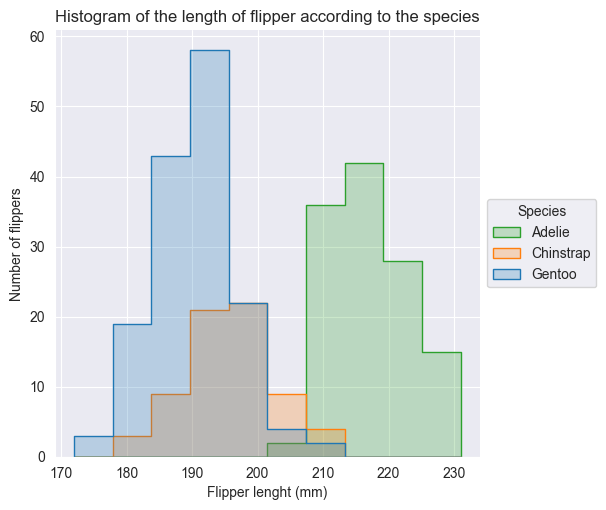

In [ ]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step", legend=False)
plt.title('Histogram of the length of flipper according to the species')
plt.xlabel('Flipper lenght (mm)')
plt.ylabel('Number of flippers')
plt.legend(title='Species', loc='center left', labels=['Adelie', 'Chinstrap', 'Gentoo'], bbox_to_anchor=(1, 0.5))

Si nous voulons plutôt afficher les histogrammes séparément, nous pouvons utiliser cette commande : `col`

Les espèces sont ici différenciées par des différents graphiques (et couleurs). Dans un cas identique nous pouvons laisser la légende tel qu'elle (au milieu à droite, à l'extérieur) sans forcément suivre le style défini :

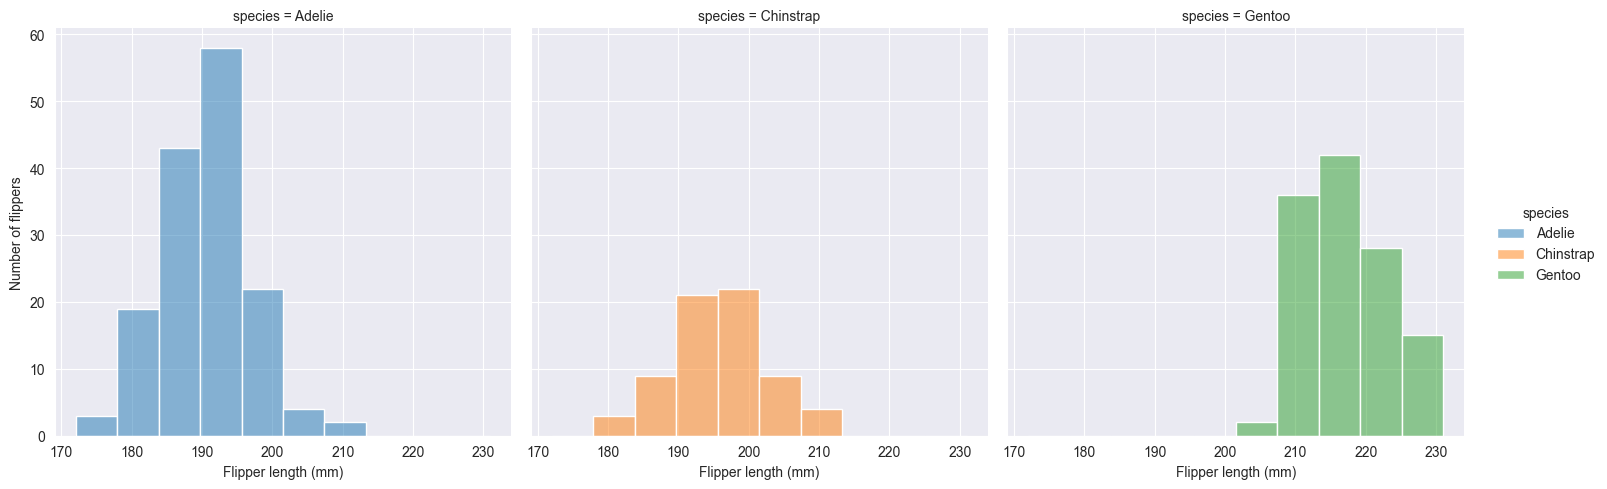

In [ ]:
fig = sns.displot(penguins, x="flipper_length_mm", hue="species", col="species")
for n_cat in range(penguins.species.nunique()):
    fig.axes[0, n_cat].set_xlabel('Flipper length (mm)')
fig.axes[0, 0].set_ylabel('Number of flippers')
plt.show()

Ici nous voulons visualiser un histogramme pour lequel les barres sont sur un même graphique : 

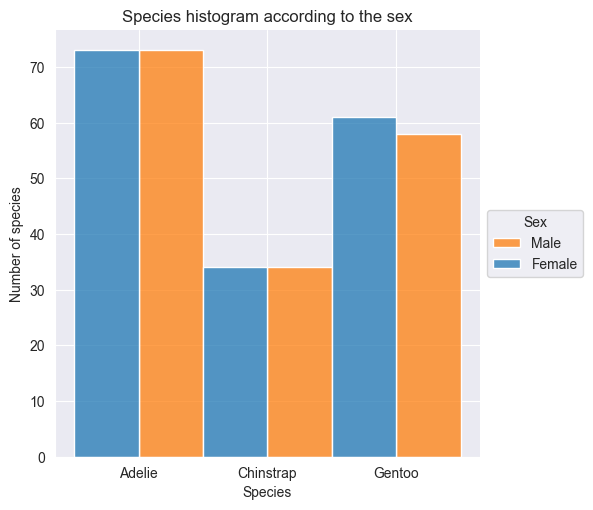

In [ ]:
sns.displot(penguins, x="species", hue="sex", multiple="dodge", legend=False)
plt.title('Species histogram according to the sex')
plt.xlabel('Species')
plt.ylabel('Number of species')
plt.legend(title='Sex', loc='center left', labels=["Male","Female"] ,bbox_to_anchor=(1, 0.5))

## Afficher plusieurs graphiques

Pour afficher plusieurs graphiques nous pouvons utiliser `sns.FacetGrid` puis la fonction `.map` ou `.map_dataframe` :

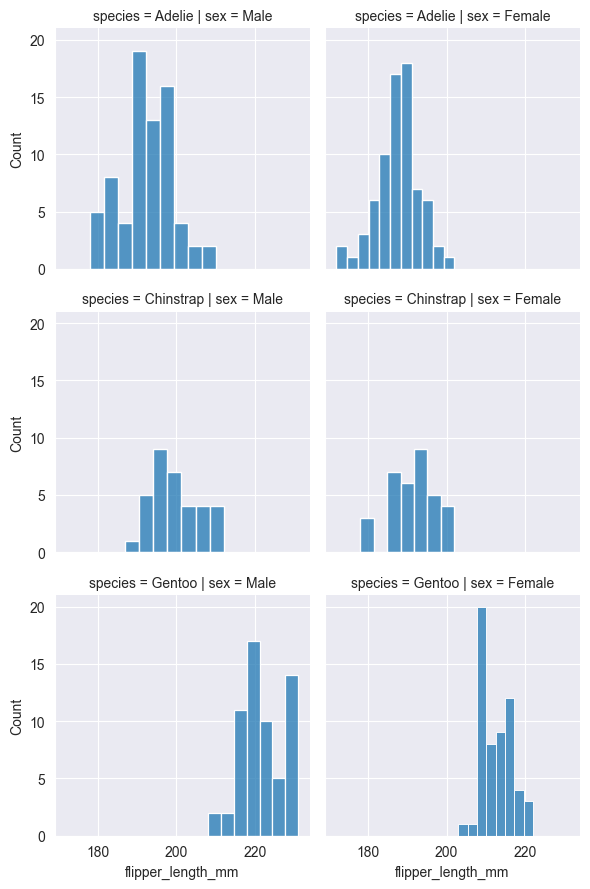

In [ ]:
# create a table with the different species for each sex 
g = sns.FacetGrid(penguins, col="sex", row="species")
p = g.map_dataframe(sns.histplot, "flipper_length_mm")

Nous pouvons aussi utiliser `sns.pairplot`, ici nous pouvons laisser la légende tel qu'elle, au milieu a droite, à l'extérieur du graphique sans le style défini :

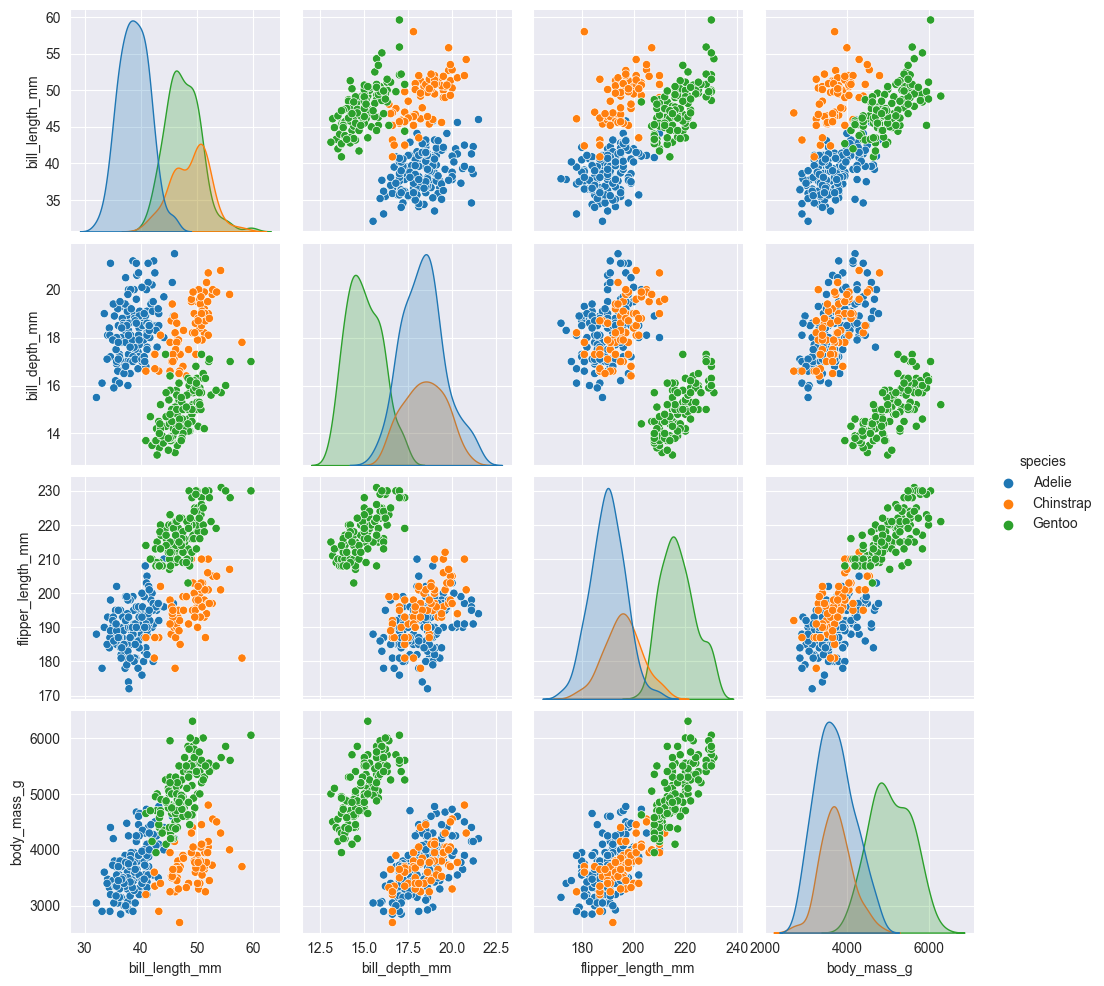

In [ ]:
sns.pairplot(penguins, hue="species", height=2.5)

# Courbes de niveaux (densité)

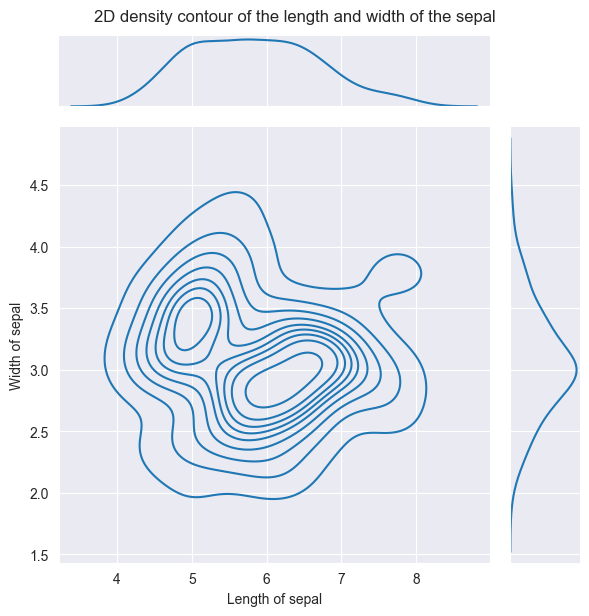

In [ ]:
df = sns.load_dataset('iris')

h = sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde', space=0.3) 
# We could have used the 'ration' parameter for the size of the marginals

# we use plt.suptitle and the parameter y = 1.02 to display the title on top 
plt.suptitle('2D density contour of the length and width of the sepal', y=1.02) 
h.set_axis_labels('Length of sepal', 'Width of sepal')
plt.show()

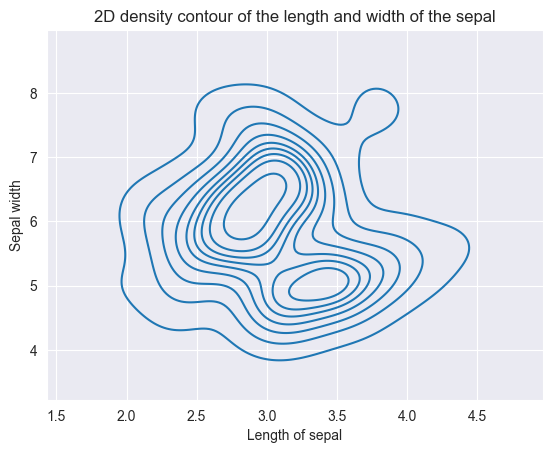

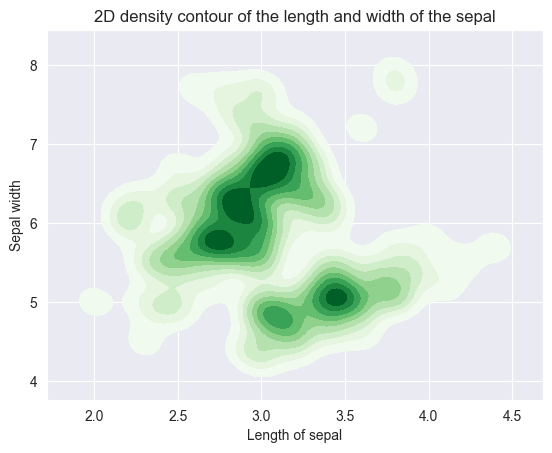

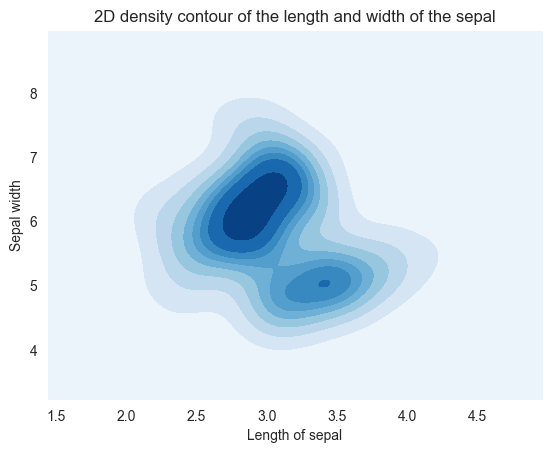

In [ ]:
# contour line 
sns.kdeplot(x=df.sepal_width, y=df.sepal_length)
plt.title('2D density contour of the length and width of the sepal')
plt.xlabel('Length of sepal')
plt.ylabel('Sepal width')
plt.show()
 
# Costuming the seam, adding shade and bandwidth
sns.kdeplot(x=df.sepal_width, y=df.sepal_length, cmap="Greens", fill=True, bw_adjust=.5)
plt.title('2D density contour of the length and width of the sepal')
plt.xlabel('Length of sepal')
plt.ylabel('Sepal width')
plt.show()

# Adding parmeter threshr
sns.kdeplot(x=df.sepal_width, y=df.sepal_length, cmap="Blues", fill=True, thresh=0)
plt.title('2D density contour of the length and width of the sepal')
plt.xlabel('Length of sepal')
plt.ylabel('Sepal width')
plt.show()

**Préférer cette visualisation pour les densités avec les points et les courbes de niveau :**

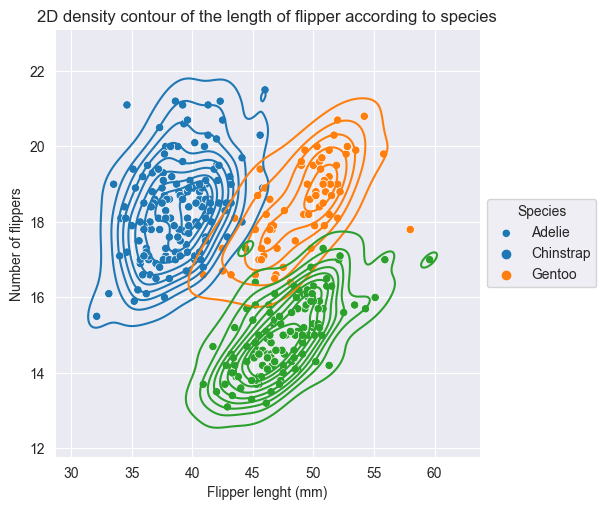

In [ ]:
# Instead of displot you can use jointplot to display density curves around contour lines
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde", legend=False)
sns.scatterplot(data=penguins, x="bill_length_mm", y ="bill_depth_mm", hue="species")
plt.title('2D density contour of the length of flipper according to species')
plt.xlabel('Flipper lenght (mm)')
plt.ylabel('Number of flippers')
plt.legend(title='Species', loc='center left', labels=['Adelie', 'Chinstrap', 'Gentoo'], bbox_to_anchor=(1, 0.5))

# Nuage de points 3D

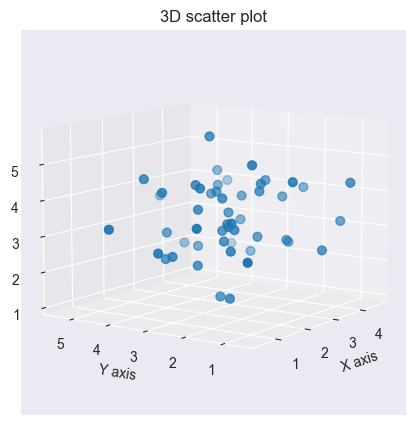

In [ ]:
# Creation of data
mean = 3
number = 50

x1 = np.random.normal(mean, 1, size=number)
y1 = np.random.normal(mean, 1, size=number)
z1 = np.random.normal(mean, 1, size=number)

# Creation of the graph
plt.figure(figsize=(6, 5))
axes = plt.axes(projection='3d')
# s allows the size of the scatter points to be varied 
axes.scatter(x1, y1, z1, s=40)


# to change the viewing angle:
axes.view_init(10, 215)

axes.set_xlabel('X axis')
axes.set_ylabel('Y axis')
axes.set_zlabel('Z axis')
plt.title('3D scatter plot')
plt.show()

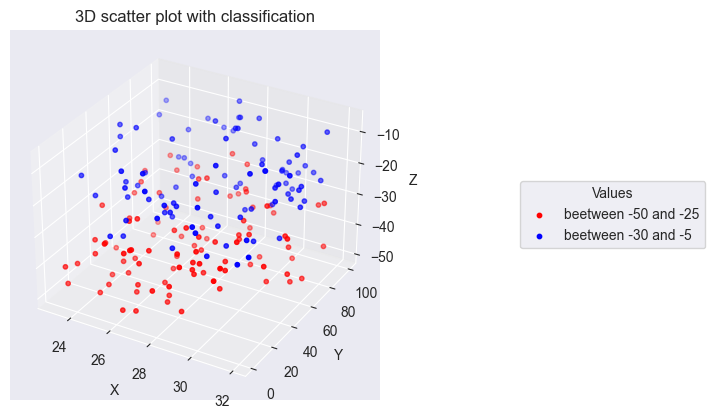

In [ ]:
# Creation of data
def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin


# Creation of the graph
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each interval we draw the random points
# x between [23, 32], y between [0, 100], z between [zlow, zhigh]
for c, z_low, z_high in [('r', -50, -25), ('b', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, z_low, z_high)
    ax.scatter(xs, ys, zs, c=c, s=10, label=c)

ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')
plt.legend(
    title="Values", loc='center right', 
    labels=["beetween -50 and -25","beetween -30 and -5"], 
    bbox_to_anchor=(1.9, 0.5)
)
plt.title('3D scatter plot with classification')

plt.show()

# Présentation des résultats

La présentation des résultats se fait avec une représentation graphique et une représentation par un tableau 

In [ ]:
def generateData(n: int,seed:int=2) -> tuple:
    """
    Function that return a tuple of two arrays
    
    Parameters:
        n:  size of xn, yn 
        seed: initialize the random number generator
        
    Out:
        xn: an array with shape (n,1)
        yn: an array with shape (n,1)
    
    """
    np.random.seed(seed)
    x = np.random.rand(n) * 2 - 1
    y = np.sin(x * 5) + np.random.normal(size=n) / np.sqrt(10)
    xn, yn = (np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))
    return xn, yn

Nous effectuons une validation croisée sur la méthode de KNN :

In [ ]:
tuned_params = {'n_neighbors': np.arange(1, 4), 'weights': ['uniform', 'distance']}
scoring = 'neg_mean_squared_error'
cv = 10
xn, yn = generateData(10000, 2)
grid_search = GridSearchCV(KNeighborsRegressor(), tuned_params, scoring=scoring, cv=cv)
grid_search.fit(xn, yn)
res = np.zeros(cv)
for i in range(cv):
    res[i] = -grid_search.cv_results_[f'split{i}_test_score'][grid_search.best_index_]

In [ ]:
df = pd.DataFrame()
df['results'] = res
df['algorithm'] = 'KNN'

Puis, nous effectuons une validation croisée pour la régression polynomiale :

In [ ]:
def PolynomialRegression(degree:int=2):
    """
    Function that make PolynomialRegression with a pipeline 
    
    Parameters:
        degree: degree of the regression
        
    Out:
        A pipeline with polynomialFeatures and LineaarRegression
    """
    return make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [ ]:
tuned_params = {'polynomialfeatures__degree': np.arange(10)}
scoring = 'neg_mean_squared_error'
grid_search = GridSearchCV(PolynomialRegression(), tuned_params, scoring=scoring, cv=cv)
grid_search.fit(xn, yn)
res = np.zeros(cv)
for i in range(cv):
    res[i] = -grid_search.cv_results_[f'split{i}_test_score'][grid_search.best_index_]

In [ ]:
df1 = pd.DataFrame()
df1['results'] = res
df1['algorithm'] = 'poly'
df = pd.concat([df, df1])

Text(0.5, 1.0, 'CV Scores for KNN and Polynomial Regression')

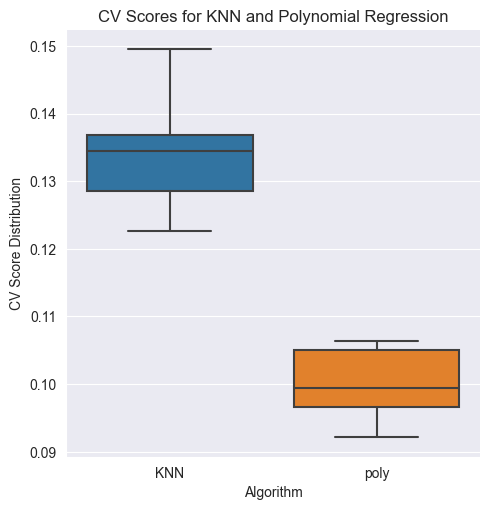

In [ ]:
sns.catplot(data=df, x='algorithm', y='results', kind='box')
plt.xlabel('Algorithm')
plt.ylabel('CV Score Distribution')
plt.title('CV Scores for KNN and Polynomial Regression')

**Si nous voulons afficher des résultats de ce tableau avec des diagramme à bâtons :**

![Results](Tableau_récap.png)

In [26]:
data = {
    'algorithm': ['algorithm1'] * 4 + ['algorithm2'] * 3,
    'score1': [15.99, 19.25, 25.00, 30.10, 29.58, 27.25, 23.12],
    'score2': [20.10, 25.11, 27.15, 30.71, 17.05, 20.13, 23.14],
    'parameter_value': [5, 10, 20, 30, 1, 10, 100],
}

results = pd.DataFrame(data)
results

,algorithm,score1,score2,parameter_value
0,algorithm1,15.99,20.10,5
1,algorithm1,19.25,25.11,10
2,algorithm1,25.00,27.15,20
3,algorithm1,30.10,30.71,30
4,algorithm2,29.58,17.05,1
5,algorithm2,27.25,20.13,10
6,algorithm2,23.12,23.14,100


Pour l'algorithme 1 :

Text(0.5, 0.98, 'Scores for algorithm1')

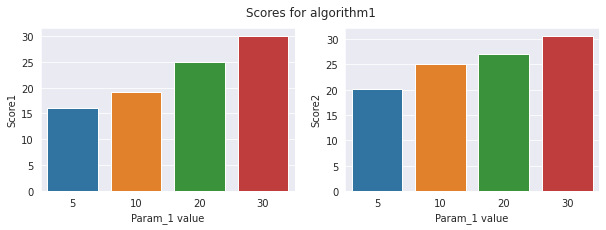

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

sns.barplot(data=results[results.algorithm == 'algorithm1'], x='parameter_value', y='score1', ax=axs[0])
sns.barplot(data=results[results.algorithm == 'algorithm1'], x='parameter_value', y='score2', ax=axs[1])

axs[0].set_xlabel('Param_1 value')
axs[0].set_ylabel('Score1')
axs[1].set_xlabel('Param_1 value')
axs[1].set_ylabel('Score2')
fig.suptitle('Scores for algorithm1')

Pour l'algorithme 2 :

Text(0.5, 0.98, 'Scores for algorithm2')

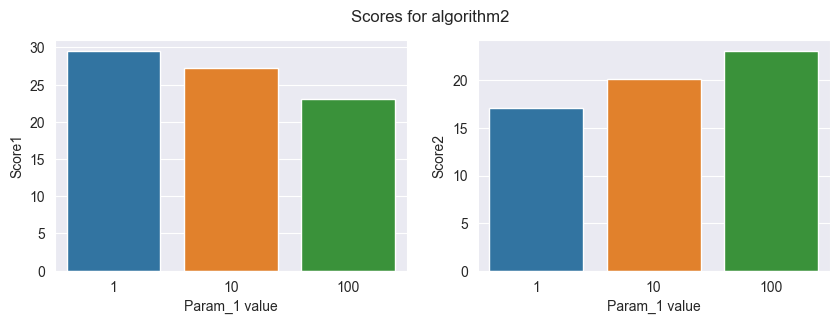

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

sns.barplot(data=results[results.algorithm == 'algorithm2'], x='parameter_value', y='score1', ax=axs[0])
sns.barplot(data=results[results.algorithm == 'algorithm2'], x='parameter_value', y='score2', ax=axs[1])

axs[0].set_xlabel('Param_1 value')
axs[0].set_ylabel('Score1')
axs[1].set_xlabel('Param_1 value')
axs[1].set_ylabel('Score2')
fig.suptitle('Scores for algorithm2')

Tracer les résultats pour les deux algorithmes avec leurs meilleures paramètres :

Text(0.5, 0.98, 'Scores for algorithm1 and algorithm 2')

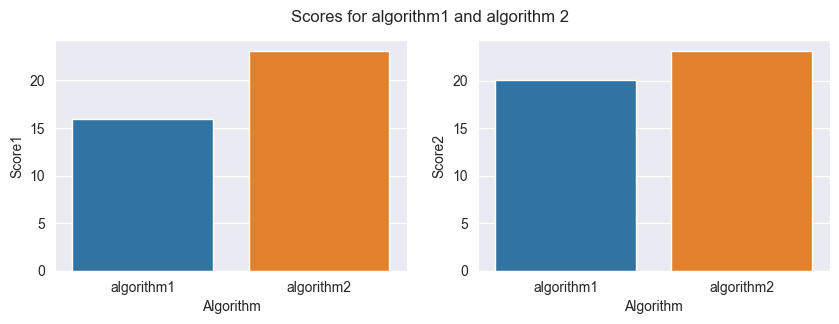

In [ ]:
# Choose a best model (based on some measure)
best_algs = [0, 6]

fig, axs = plt.subplots(1, 2, figsize=(10, 3))

sns.barplot(data=results.iloc[best_algs], x='algorithm', y='score1', ax=axs[0])
sns.barplot(data=results.iloc[best_algs], x='algorithm', y='score2', ax=axs[1])

axs[0].set_xlabel('Algorithm')
axs[0].set_ylabel('Score1')
axs[1].set_xlabel('Algorithm')
axs[1].set_ylabel('Score2')
fig.suptitle('Scores for algorithm1 and algorithm2')